# Libraries

In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime, date
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import *
from sklearn.metrics import r2_score

# Input data - dropping date and bitcoin opening, high and low prices

In [30]:
data = pd.read_csv('/home/hoangbaoan1901/Documents/information-system_UET/sem5/prdan/Homeworks/week-3-btl/datasets/jrfm-2156907-cleaned.csv')

In [31]:
data['Date'] = pd.to_datetime(data['Date'])

In [32]:
data.head()

,Date,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,Active Addr Cnt,Xfer Cnt,Mean Tx Size (native units),Total Fees (USD),...,RUB,Tweets,Google,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2015-08-07,278.740997,280.391998,276.365997,279.584991,42484800.0,283150,497302,2.057514,7235.134845,...,64.480003,47467,90.000000,0,0,0,0,1,0,0
1,2015-08-08,279.742004,279.928009,260.709991,260.997009,58533000.0,266587,284532,3.675623,5806.842316,...,64.480003,29031,91.578947,0,0,0,0,0,1,0
2,2015-08-09,261.115997,267.002991,260.467987,265.083008,23789600.0,262571,276720,4.201519,4952.554125,...,64.480003,27132,91.578947,0,0,0,0,0,0,1
3,2015-08-10,265.477997,267.032013,262.596008,264.470001,20979400.0,292834,304538,3.463212,7563.840456,...,64.480003,27744,96.315789,1,0,0,0,0,0,0
4,2015-08-11,264.342010,270.385986,264.093994,270.385986,25433900.0,271613,280398,3.785274,7128.842169,...,62.889999,26653,104.210526,0,1,0,0,0,0,0


In [33]:
data.shape

(2430, 48)

In [34]:
data.isna().sum()

Date                           0
BTC_Open                       0
BTC_High                       0
BTC_Low                        0
BTC_Close                      0
BTC_Volume                     0
Active Addr Cnt                0
Xfer Cnt                       0
Mean Tx Size (native units)    0
Total Fees (USD)               0
Mean Hash Rate                 0
Difficulty                     0
Mean Block Size (in bytes)     0
Sum Block Weight               0
LTC                            0
XRP                            0
DASH                           0
DOGE                           0
ETH                            0
Gold                           0
Silver                         0
Copper                         0
Oil                            0
Treasury Yield 10 Years        0
S&P500                         0
DJI                            0
CBOE                           0
NASDAQ                         0
JP225                          0
CSI300                         0
DXY       

# Split data into train and test set

In [35]:
start_day_p2 = pd.Timestamp(2018, 10, 1)
test_day_p2 = pd.Timestamp(2021, 10, 1)
end_day_p2 = pd.Timestamp(2022, 4, 1)

period2 = data[(data["Date"] <= end_day_p2)].reset_index(drop = True)
train_dataset_p2 = period2[period2["Date"] < test_day_p2].reset_index(drop = True)
test_dataset_p2 = period2[period2["Date"] >= test_day_p2].reset_index(drop = True)
train_dataset_p2 = train_dataset_p2.drop(columns = ["Date"])
test_dataset_p2 = test_dataset_p2.drop(columns = ["Date"])

In [36]:
# Define the target variable
target = 'BTC_Close'

# Create the feature sets
X_train = train_dataset_p2
X_test = test_dataset_p2

# Create the target sets
Y_train = train_dataset_p2[target]
Y_test = test_dataset_p2[target]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

ts = 1 # Define the time step
# Create sequences with a time step defined by ts
def create_sequences(data, target, time_step=ts):
	X, y = [], []
	for i in range(len(data) - time_step):
		X.append(data[i:(i + time_step)])
		y.append(target[i + time_step])
	return np.array(X), np.array(y)

X_train, Y_train = create_sequences(X_train.values, Y_train.values)
X_test, Y_test = create_sequences(X_test.values, Y_test.values)

print("X_train shape after sequencing:", X_train.shape)
print("X_test shape after sequencing:", X_test.shape)
print("Y_train shape after sequencing:", Y_train.shape)
print("Y_test shape after sequencing:", Y_test.shape)

X_train shape: (2247, 47)
X_test shape: (183, 47)
Y_train shape: (2247,)
Y_test shape: (183,)
X_train shape after sequencing: (2246, 1, 47)
X_test shape after sequencing: (182, 1, 47)
Y_train shape after sequencing: (2246,)
Y_test shape after sequencing: (182,)


# Normalize data with MinMaxScaler

In [37]:
# Normalize the datasets using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Update the variables used for training
X_train = X_train_scaled
X_test = X_test_scaled

print(X_train) 

[[[1.08464707e-03 8.36536130e-04 1.23850575e-03 ... 1.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[1.10045735e-03 8.29357724e-04 9.86027798e-04 ... 0.00000000e+00
   1.00000000e+00 0.00000000e+00]]

 [[8.06271239e-04 6.29393885e-04 9.82125099e-04 ... 0.00000000e+00
   0.00000000e+00 1.00000000e+00]]

 ...

 [[6.79538949e-01 6.82071838e-01 6.77172610e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[6.63218858e-01 6.58275764e-01 6.56869740e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]

 [[6.45277807e-01 6.54719171e-01 6.55224891e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]]]


# Model initialization & compilation

In [38]:
from tensorflow.keras.optimizers import Adam

model = tf.keras.Sequential([
	tf.keras.layers.InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])),
	tf.keras.layers.GRU(256, return_sequences=True, activation='relu', kernel_regularizer='l2'),
	tf.keras.layers.Dropout(0.25),
	tf.keras.layers.LSTM(256, return_sequences=False, activation='relu', kernel_regularizer='l2'),
	tf.keras.layers.Dropout(0.25),
	tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mse'])

/home/hoangbaoan1901/Development/anaconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


# Fit train set with label using LSTM model, predict & visualization

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

# Fit the model
# Define early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train, Y_train, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 298819520.0000 - mae: 10418.4355 - mse: 298819520.0000
Epoch 2/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 262946160.0000 - mae: 9407.0820 - mse: 262946160.0000
Epoch 3/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 188302464.0000 - mae: 7550.5732 - mse: 188302432.0000
Epoch 4/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98587488.0000 - mae: 6748.9878 - mse: 98587456.0000
Epoch 5/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48496784.0000 - mae: 4903.8711 - mse: 48496736.0000
Epoch 6/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17600828.0000 - mae: 2207.4363 - mse: 17600766.0000
Epoch 7/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10694180.0000 - mae: 1781.2960 - mse: 10694108.0000
Epoch 8/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7132474.5000 - mae: 1513.4980 - mse: 7132397.0000
Epoch 9/1000
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6916389.0000 - mae: 1451.4840 - mse: 69

In [40]:
# Use the model to make predictions on the test set
predictions = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(Y_test, predictions)
print("R^2 score:", r2)
# RMSE
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test, predictions)
print("RMSE:", rmse)

# Directional Accuracy
def directional_accuracy(y_true, y_pred):
	y_test_da = np.array(y_true)
	y_pred_0 = y_pred[1:] - y_test_da[:-1]
	y_test_0 = y_true[1:] - y_test_da[:-1]
	DA = (y_pred_0<0) == (y_test_0<0)
	return np.mean(DA)*100

da = directional_accuracy(Y_test, predictions)



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
R^2 score: 0.8356695336796723
RMSE: 3562.6667311891542


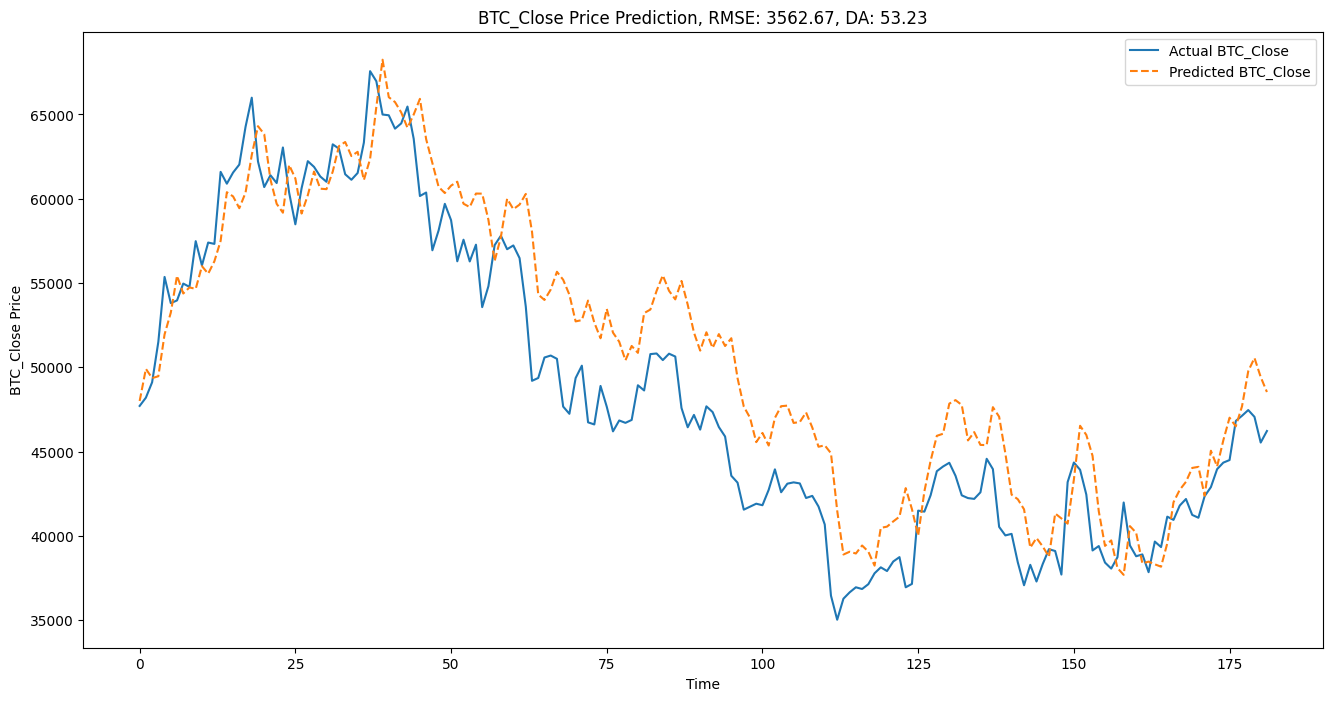

In [41]:
# Plot the predictions against the actual values
plt.figure(figsize=(16, 8))
plt.plot(Y_test, label='Actual BTC_Close')
plt.plot(predictions, label='Predicted BTC_Close', linestyle='dashed')
plt.title('BTC_Close Price Prediction, RMSE: {:.2f}, DA: {:.2f}'.format(rmse, da))
plt.xlabel('Time')
plt.ylabel('BTC_Close Price')
plt.legend()
plt.show()

In [42]:
# import pickle

# # Save the model
# pickle.dump(model, open('/home/hoangbaoan1901/Documents/information-system_UET/sem5/prdan/Homeworks/week-3-btl/implementations/models/gru-lstm_p2.pkl', 'wb'))